We simulate a simple time series using an ARMA process

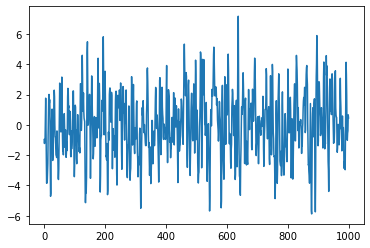

In [71]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12354)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar1 = np.r_[1, -arparams] # add zero-lag and negate
ma1 = np.r_[1, maparams] # add zero-lag
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)


Now we fill our matrix F of latent factor time series

In [72]:

F = np.zeros((1000,10))
for i in range(0,10):
    F[:,i] =  AR_object1.generate_sample(nsample=1000).T
data

array([[40.36177324, 42.02522744, 55.87374911, ..., 43.82199614,
        37.02252392, 60.02700525],
       [40.79327258, 41.62809656, 60.24131269, ..., 41.74674949,
        37.85991872, 59.51870255],
       [42.17442232, 41.87421711, 57.66881216, ..., 43.6823555 ,
        37.51549177, 55.21406543],
       ...,
       [38.51623282, 41.3969471 , 53.21730576, ..., 43.04746184,
        35.21829815, 58.13686949],
       [44.10928538, 43.43430207, 57.62892547, ..., 49.78080282,
        38.94833443, 63.82280304],
       [47.19967908, 44.46461404, 58.2804628 , ..., 53.14074425,
        39.04169875, 63.86151735]])

We translate all the elements so that there are no negative entries

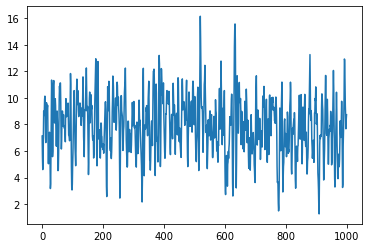

In [73]:
F = F - np.min(F)
plt.plot(F[:,0])

We create our factor loading matrix

In [74]:
M = np.random.rand(10,1000)
M

array([[0.35789488, 0.83290101, 0.17163425, ..., 0.77588681, 0.33472516,
        0.87065115],
       [0.75665511, 0.14603696, 0.19572311, ..., 0.33675793, 0.70174313,
        0.88499417],
       [0.38922125, 0.49195651, 0.80557913, ..., 0.29266933, 0.40337878,
        0.80391674],
       ...,
       [0.31852254, 0.10884813, 0.99998731, ..., 0.12342507, 0.79173309,
        0.39907811],
       [0.92047402, 0.35081745, 0.93731769, ..., 0.32052247, 0.67253535,
        0.99347993],
       [0.19750259, 0.87600293, 0.96295294, ..., 0.98757279, 0.31520364,
        0.9693462 ]])

We create our clean data given as FxM

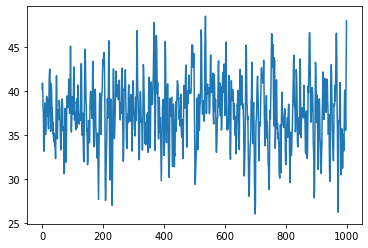

In [75]:
G=np.matmul(F,M)
plt.plot(G[:,0])

We add normal i.i.d noise to each entry of the matrix

In [76]:
E = np.random.normal(loc=0, scale=1, size=(1000,1000))

In [77]:
data = G + E


In [78]:
np.min(np.min(data))

11.578230376392382

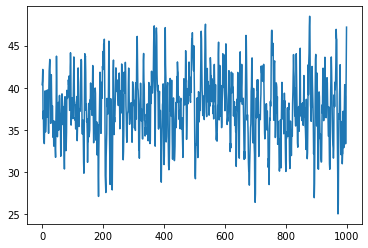

In [79]:
plt.plot(data[:,0])

In [80]:
import pandas as pd
data_df = pd.DataFrame(columns = ['C_' + str(idx) for idx in range(0,1000)],data=data)

In [81]:
data_df

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_990,C_991,C_992,C_993,C_994,C_995,C_996,C_997,C_998,C_999
0,40.361773,42.025227,55.873749,40.274249,38.810148,46.348840,37.564026,37.130353,38.276739,39.932540,...,46.159731,45.699125,46.767612,60.330125,54.276701,51.800070,43.536606,43.821996,37.022524,60.027005
1,40.793273,41.628097,60.241313,37.058568,37.608338,46.604773,38.776044,36.931813,37.886085,40.328893,...,45.761054,45.162766,46.083806,60.622125,55.117247,48.383596,41.721967,41.746749,37.859919,59.518703
2,42.174422,41.874217,57.668812,35.109669,39.395837,43.636932,36.261829,36.174270,37.986713,40.976112,...,44.135554,43.981177,40.576231,57.587849,57.191793,49.762000,40.948384,43.682355,37.515492,55.214065
3,36.295085,43.061185,54.835802,37.694746,39.617176,41.191281,34.300526,33.787531,39.126973,37.595500,...,41.999623,41.587861,41.320210,55.752712,54.424011,49.878696,38.939641,40.535725,34.965345,53.861228
4,37.217144,42.751919,54.538925,36.074938,38.223511,43.691164,36.433073,37.605789,36.911454,36.726223,...,47.472279,41.881882,44.012169,56.929242,52.069351,50.578029,39.668416,40.880498,36.464840,56.407349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38.947251,37.867486,51.787503,40.820848,34.503028,43.944471,35.450646,34.348601,33.673263,36.762890,...,42.693280,42.967264,46.337143,54.451362,44.741468,45.436437,39.745062,36.936372,35.844810,55.948441
996,33.336698,39.251092,50.851362,41.027198,38.645082,43.434862,35.634125,35.703761,35.595830,37.424874,...,39.608945,42.161765,43.631775,52.329830,46.136873,45.537795,39.352889,37.476532,33.461479,55.823549
997,38.516233,41.396947,53.217306,38.909613,38.222358,43.220031,35.832453,36.880258,40.016825,42.216034,...,44.812105,44.337086,45.496275,56.104584,49.838138,48.365832,42.635013,43.047462,35.218298,58.136869
998,44.109285,43.434302,57.628925,41.143336,43.919416,47.518320,40.615595,38.775437,44.502516,46.215175,...,51.168752,51.718902,48.246720,62.858204,54.527040,52.614501,44.744932,49.780803,38.948334,63.822803


In [82]:
data_df.to_csv('../sim/data/ar1.csv', index=False)